In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(color_codes=True)

In [158]:
df = pd.read_csv("traffic_accidents.csv")
df.head(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [159]:
df.dtypes

crash_date                        object
traffic_control_device            object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
crash_type                        object
intersection_related_i            object
damage                            object
prim_contributory_cause           object
num_units                          int64
most_severe_injury                object
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtype: object

In [160]:
df = df.drop([
    'crash_date', 'trafficway_type', 'alignment', 'injuries_incapacitating',
    'injuries_non_incapacitating', 'injuries_reported_not_evident',
    'injuries_no_indication', 'first_crash_type', 'intersection_related_i',
    'most_severe_injury'], axis=1)
df.head(5)

,traffic_control_device,weather_condition,lighting_condition,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,num_units,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,crash_month
0,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,2,0.0,0.0,13,7,7
1,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,0.0,0.0,0,1,8
2,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,0.0,0.0,10,5,12
3,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,2,5.0,0.0,19,4,8
4,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,0.0,0.0,14,7,8


In [161]:
df = df.rename(columns={'traffic_control_device': 'Traffic Device',
          'weather_condition': 'Weather Condition',
          'lighting_condition': 'Light on Road',
          'roadway_surface_cond': 'Road Condition',
          'road_defect': 'Road Defect',
          'crash_type': 'Crash Type',
          'damage': 'Damage',
          'prim_contributory_cause': 'Primary Cause',
          'num_units': 'Number of Units',
          'most_severe_injury': 'Worst Injury',
          'injuries_total': "Injuries",
          'injuries_fatal': 'Fatal Injuries',
          'crash_hour': 'Crash Hour',
          'crash_day_of_week': 'Crash Day',
          'crash_month': 'Crash Month'
          })
df.head(5)

,Traffic Device,Weather Condition,Light on Road,Road Condition,Road Defect,Crash Type,Damage,Primary Cause,Number of Units,Injuries,Fatal Injuries,Crash Hour,Crash Day,Crash Month
0,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,2,0.0,0.0,13,7,7
1,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,0.0,0.0,0,1,8
2,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,0.0,0.0,10,5,12
3,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,2,5.0,0.0,19,4,8
4,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,0.0,0.0,14,7,8


In [162]:
df.isnull().sum()

Traffic Device       0
Weather Condition    0
Light on Road        0
Road Condition       0
Road Defect          0
Crash Type           0
Damage               0
Primary Cause        0
Number of Units      0
Injuries             0
Fatal Injuries       0
Crash Hour           0
Crash Day            0
Crash Month          0
dtype: int64

In [163]:
df.drop_duplicates()
df.head(5)

,Traffic Device,Weather Condition,Light on Road,Road Condition,Road Defect,Crash Type,Damage,Primary Cause,Number of Units,Injuries,Fatal Injuries,Crash Hour,Crash Day,Crash Month
0,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,2,0.0,0.0,13,7,7
1,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,0.0,0.0,0,1,8
2,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,0.0,0.0,10,5,12
3,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,2,5.0,0.0,19,4,8
4,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,0.0,0.0,14,7,8


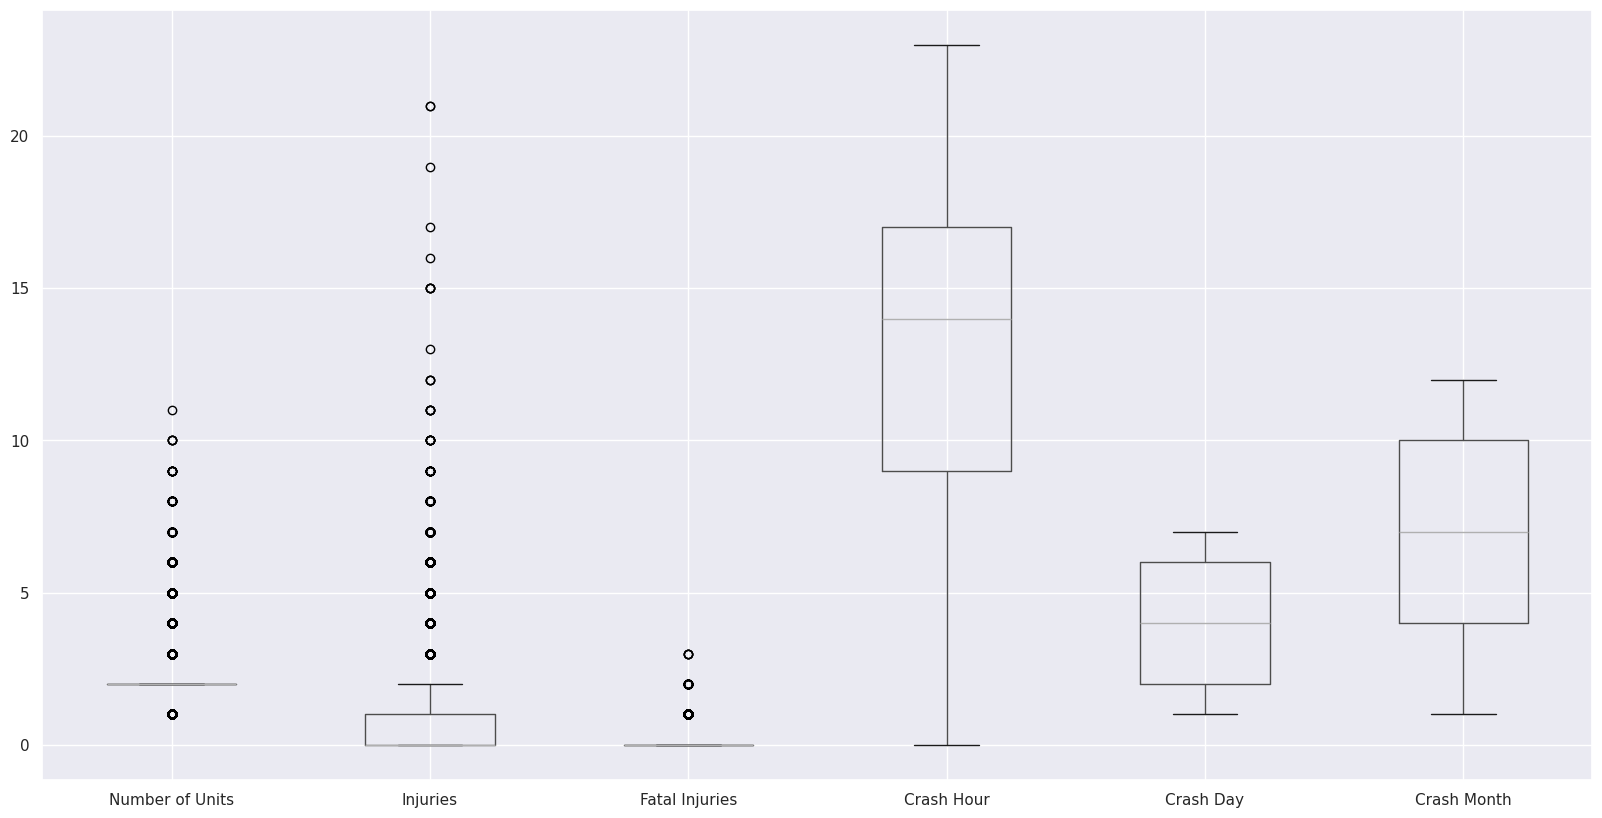

In [164]:

df.boxplot(figsize=(20, 10))
plt.show()


In [165]:
df_raw = df
whis = 1.5
Q1 = df['Injuries'].quantile(0.25)
Q3 = df['Injuries'].quantile(0.75)
IQR = Q3 - Q1
df = df[((df['Injuries'] >= (Q1 - IQR * whis)) & (df['Injuries'] <= (Q3 + IQR * whis)))]
df.shape

(203614, 14)

- crashes per day, month
- most severe day
- road condition number of crashes/fatal
- top 5 primary causes
- top traffic device
- weather condition injuries
- light on road, primary cause

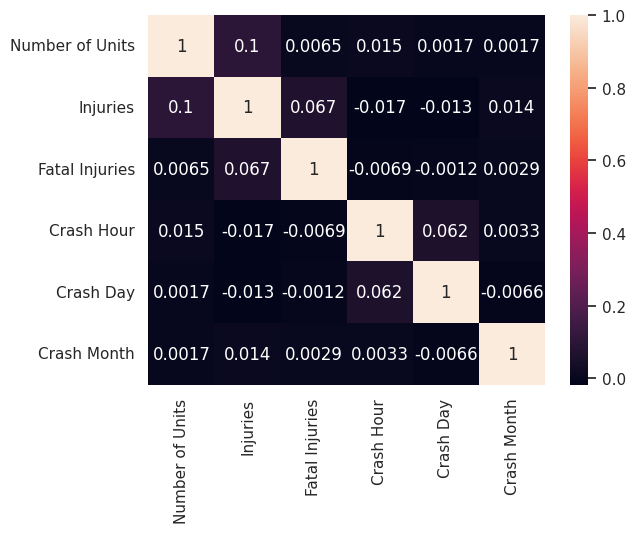

In [166]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

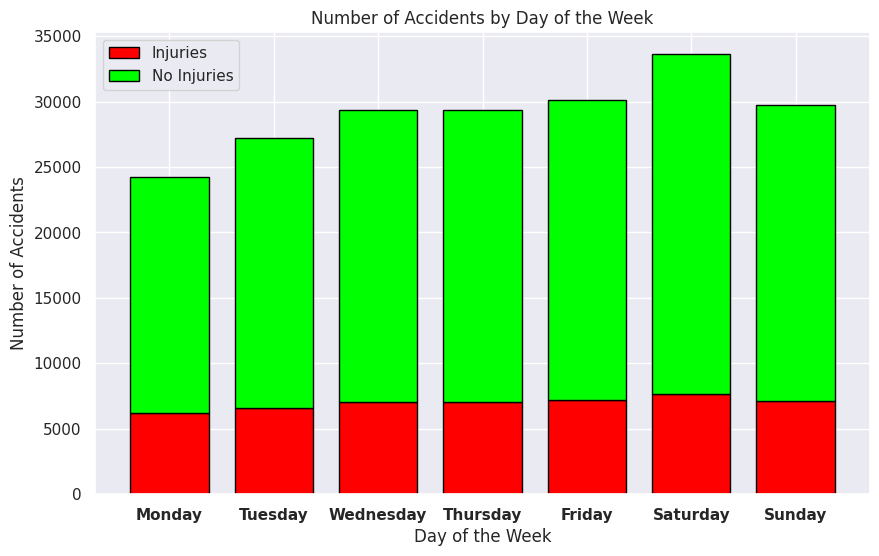

In [167]:
df_non_injuries_day = df[df['Injuries'] == 0].groupby(by='Crash Day').size()
df_injuries_day = df[df['Injuries'] > 0].groupby(by='Crash Day').size()
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
bar_width = 1.5
r = range(0, 14, 2)
plt.figure(figsize=(10, 6))
plt.bar(r, df_injuries_day, width=bar_width, color='#ff0000', edgecolor='black', label='Injuries')
plt.bar(r, df_non_injuries_day, width=bar_width, color='#00ff00', edgecolor='black', bottom=df_injuries_day, label='No Injuries')
plt.xticks(r, days, fontweight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Day of the Week")
plt.legend()
plt.show()

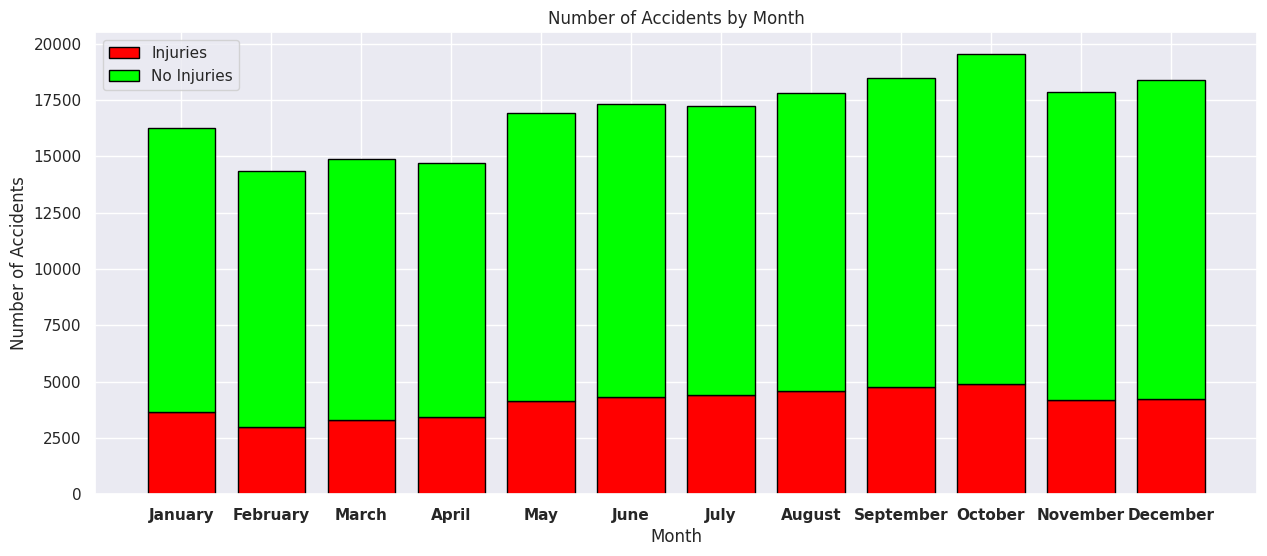

In [168]:
df_non_injuries_month = df[df['Injuries'] == 0].groupby(by='Crash Month').size()
df_injuries_month = df[df['Injuries'] > 0].groupby(by='Crash Month').size()
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

bar_width = 1.5
r = range(0, 24, 2)
plt.figure(figsize=(15, 6))
plt.bar(r, df_injuries_month, width=bar_width, color='#ff0000', edgecolor='black', label='Injuries')
plt.bar(r, df_non_injuries_month, width=bar_width, color='#00ff00', edgecolor='black', bottom=df_injuries_month, label='No Injuries')
plt.xticks(r, months, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Month")
plt.legend()
plt.show()

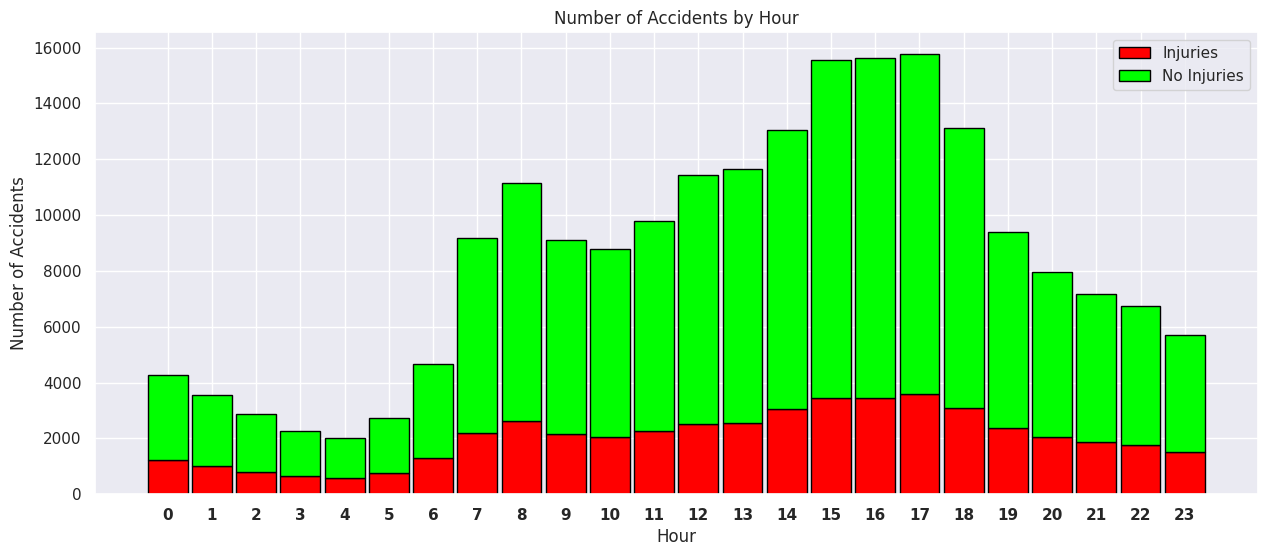

In [169]:
df_non_injuries_hour = df[df['Injuries'] == 0].groupby(by='Crash Hour').size()
df_injuries_hour = df[df['Injuries'] > 0].groupby(by='Crash Hour').size()

bar_width = 0.9
r = range(0, 24, 1)
plt.figure(figsize=(15, 6))
plt.bar(r, df_injuries_hour, width=bar_width, color='#ff0000', edgecolor='black', label='Injuries')
plt.bar(r, df_non_injuries_hour, width=bar_width, color='#00ff00', edgecolor='black', bottom=df_injuries_hour, label='No Injuries')
plt.xticks(r, fontweight='bold')
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Hour")
plt.legend()
plt.show()

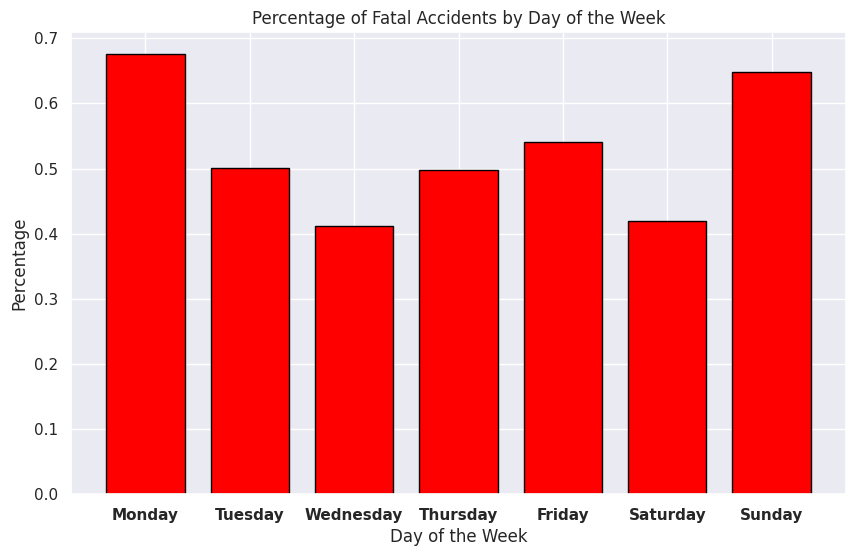

In [170]:
df_fatal_injuries = df[df['Fatal Injuries'] > 0].groupby(by='Crash Day').size()

fatal = [100 * i/j for i,j in zip(df_fatal_injuries, df_injuries_day)]
bar_width = 1.5
r = range(0, 14, 2)
plt.figure(figsize=(10, 6))
plt.bar(r, fatal , color='#ff0000', edgecolor='black', width=bar_width, label='Fatal')
plt.xticks(r, days, fontweight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Percentage")
plt.title("Percentage of Fatal Accidents by Day of the Week")

plt.show()

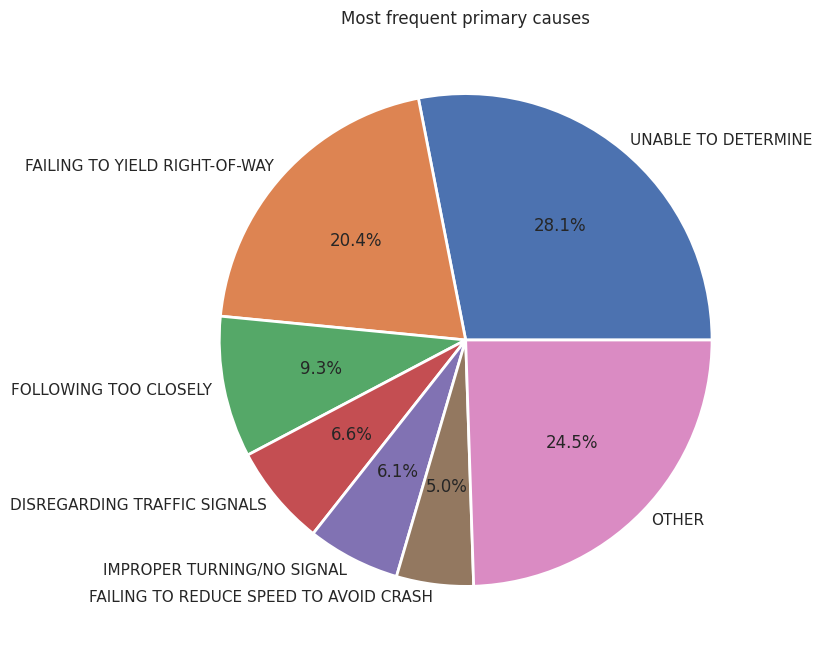

In [171]:
df_primary_causes = df.groupby(by='Primary Cause').size().sort_values(ascending=False)[0:6]
values = df_primary_causes.to_list()
values.append(df.shape[0] - df_primary_causes.sum())
names = df_primary_causes.index.to_list()
names.append('OTHER')
plt.figure(figsize=(10, 8))
plt.pie(values, labels=names, labeldistance=1.05, wedgeprops={'linewidth' : 2}, autopct='%1.1f%%')
plt.title("Most frequent primary causes")
plt.show()


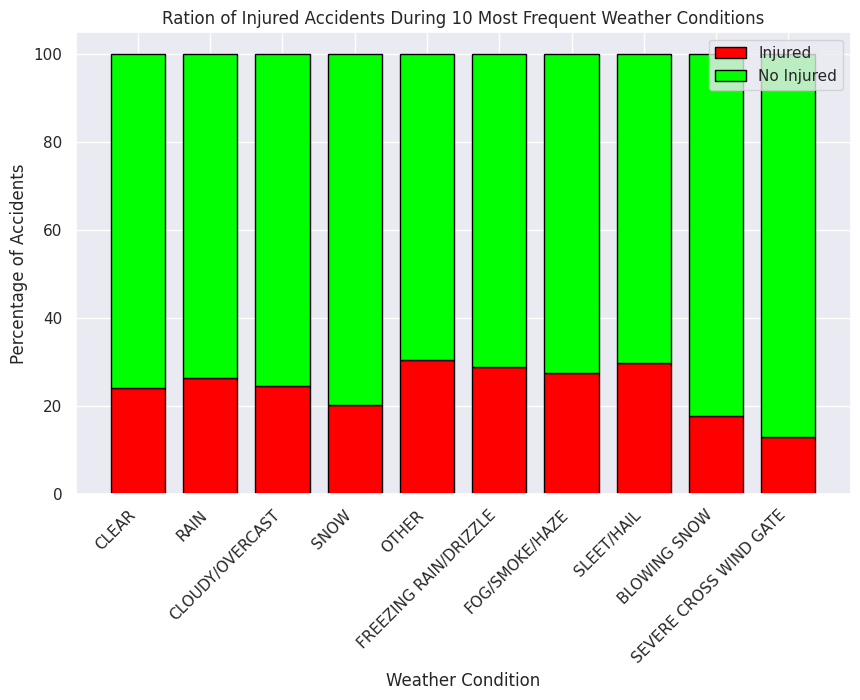

In [173]:
df_weather = df[(df['Weather Condition'] != 'UNKNOWN')].groupby(by='Weather Condition').size().sort_values(ascending=False)[0: 10]
df_weather_injuries = df[df['Injuries'] > 0 & (df['Weather Condition'] != 'UNKNOWN')].groupby(by='Weather Condition').size()
labels = df_weather.index.to_list()
injured = [100 * df_weather_injuries.get(i, 0) / df_weather[i] for i in labels]
non_injured = [100 - i for i in injured]
r = range(0, 20, 2)
bar_width = 1.5
plt.figure(figsize=(10, 6))
plt.bar(r, injured, color='#ff0000', edgecolor='black', width=bar_width, label='Injured')
plt.bar(r, non_injured, color='#00ff00', edgecolor='black', width=bar_width, bottom=injured, label='No Injured')
plt.xticks(r, labels, rotation=45, ha='right')
plt.xlabel("Weather Condition")
plt.ylabel("Percentage of Accidents")
plt.title("Ration of Injured Accidents During 10 Most Frequent Weather Conditions")
plt.legend()
plt.show()